In [56]:
import pickle, os
import sys
from utils import QS, sample_apply

In [57]:
sys.path.append('CONFIG_files/')

In [58]:
import CONFIG_POApEySbNW as CONFIG

In [59]:
from analysis_seasonal import *

In [60]:
run_prefix = 'POApEySbNW'

with open(f'_experiments/{run_prefix}/predictions.pkl', 'rb') as handle:
    predictions = pickle.load(handle)

In [61]:
def compute_QS(predictions, quantile = 0.5): 
    for k,v in predictions.items(): 
        p = v['k_all']
        p[f'QS_quantile_{quantile}'] = quantile
        likelihood = k.split('_')[2]
        p[f'QS_sample_{quantile}'] = p.apply(sample_apply, axis=1, args=(likelihood, 10000, f'QS_quantile_{quantile}'))
        p[f'QS_{quantile}'] = p.apply(QS, axis=1, args=('QS_sample', 'Prec', quantile))
        print(f'Completed {k} {quantile}')

In [62]:
compute_QS(predictions, quantile = 0.10)
compute_QS(predictions, quantile = 0.25)
compute_QS(predictions, quantile = 0.50)
compute_QS(predictions, quantile = 0.75)
compute_QS(predictions, quantile = 0.90)
compute_QS(predictions, quantile = 0.95)

Completed VGLM_[]_bgmm_B=128_D=0 0.1
Completed MLP_[10]_bgmm_B=128_D=0 0.1
Completed SimpleRNN_[10]_bgmm_B=128_D=0 0.1
Completed VGLM_[]_bgmm_B=128_D=0 0.25
Completed MLP_[10]_bgmm_B=128_D=0 0.25
Completed SimpleRNN_[10]_bgmm_B=128_D=0 0.25
Completed VGLM_[]_bgmm_B=128_D=0 0.5
Completed MLP_[10]_bgmm_B=128_D=0 0.5
Completed SimpleRNN_[10]_bgmm_B=128_D=0 0.5
Completed VGLM_[]_bgmm_B=128_D=0 0.75
Completed MLP_[10]_bgmm_B=128_D=0 0.75
Completed SimpleRNN_[10]_bgmm_B=128_D=0 0.75
Completed VGLM_[]_bgmm_B=128_D=0 0.9
Completed MLP_[10]_bgmm_B=128_D=0 0.9
Completed SimpleRNN_[10]_bgmm_B=128_D=0 0.9
Completed VGLM_[]_bgmm_B=128_D=0 0.95
Completed MLP_[10]_bgmm_B=128_D=0 0.95
Completed SimpleRNN_[10]_bgmm_B=128_D=0 0.95


In [63]:
sample_cols = [f'sample_{i}' for i in range(CONFIG.n_samples)]
add_cols = []
columns = ['Prec','wrf_prcp','wrf_bc_prcp','precip_norris']

In [64]:
for p in predictions.keys(): 
    for k,v in predictions[p].items():
        v['wrf_prcp'] = v['precip_norris'] 
        v['wrf_bc_prcp'] = v['precip_norris'] 

In [65]:
for k,v in predictions.items():
    print(f"{k : <40} {v['k_all'].BS.mean():.3f}")

VGLM_[]_bgmm_B=128_D=0                   0.344
MLP_[10]_bgmm_B=128_D=0                  0.334
SimpleRNN_[10]_bgmm_B=128_D=0            0.325


In [66]:
# compute_QS(predictions, quantile = 0.10)

In [67]:
for k,v in predictions.items():
    print(f"{k : <40} {v['k_all']['QS_0.1'].mean():.3f}")

VGLM_[]_bgmm_B=128_D=0                   3.613
MLP_[10]_bgmm_B=128_D=0                  3.995
SimpleRNN_[10]_bgmm_B=128_D=0            3.147


In [68]:
for k,v in predictions.items():
    print(f"{k : <40} {v['k_all']['QS_0.25'].mean():.3f}")

VGLM_[]_bgmm_B=128_D=0                   3.091
MLP_[10]_bgmm_B=128_D=0                  3.415
SimpleRNN_[10]_bgmm_B=128_D=0            2.715


In [69]:
for k,v in predictions.items():
    print(f"{k : <40} {v['k_all']['QS_0.5'].mean():.3f}")

VGLM_[]_bgmm_B=128_D=0                   2.222
MLP_[10]_bgmm_B=128_D=0                  2.448
SimpleRNN_[10]_bgmm_B=128_D=0            1.996


In [70]:
for k,v in predictions.items():
    print(f"{k : <40} {v['k_all']['QS_0.75'].mean():.3f}")

VGLM_[]_bgmm_B=128_D=0                   1.353
MLP_[10]_bgmm_B=128_D=0                  1.481
SimpleRNN_[10]_bgmm_B=128_D=0            1.276


In [71]:
for k,v in predictions.items():
    print(f"{k : <40} {v['k_all']['QS_0.9'].mean():.3f}")

VGLM_[]_bgmm_B=128_D=0                   0.831
MLP_[10]_bgmm_B=128_D=0                  0.900
SimpleRNN_[10]_bgmm_B=128_D=0            0.845


In [72]:
for k,v in predictions.items():
    print(f"{k : <40} {v['k_all']['QS_0.95'].mean():.3f}")

VGLM_[]_bgmm_B=128_D=0                   0.657
MLP_[10]_bgmm_B=128_D=0                  0.707
SimpleRNN_[10]_bgmm_B=128_D=0            0.701


In [73]:
table_of_predictions_ks_test(predictions, CONFIG.seasons, columns, sample_cols, add_cols)

VGLM_[]_bgmm_B=128_D=0
MLP_[10]_bgmm_B=128_D=0
SimpleRNN_[10]_bgmm_B=128_D=0
Model                          JFM mean    JFM median    AM mean    AM median    JJAS mean    JJAS median    OND mean    OND median
-----------------------------  ----------  ------------  ---------  -----------  -----------  -------------  ----------  ------------
Bann                           0.2640      0.1496        0.1938     0.1252       0.1780       0.0880         0.1694      0.1101
BannCorr                       0.2640      0.1496        0.1938     0.1252       0.1780       0.0880         0.1694      0.1101
Norr                           0.2640      0.1496        0.1938     0.1252       0.1780       0.0880         0.1694      0.1101
VGLM_[]_bgmm_B=128_D=0         0.2117      0.1394        0.1119     0.0760       0.0600       0.0533         0.2311      0.1322
MLP_[10]_bgmm_B=128_D=0        0.1913      0.1642        0.1279     0.0942       0.0759       0.0549         0.2039      0.1131
SimpleRNN_[10]_bg

In [76]:
table_of_predictions_for_metric(predictions, CONFIG.seasons, columns, CONFIG.n_samples, sample_cols, add_cols, metric = 'smape', prefix='smape')

Model                          JFM mean    JFM median    AM mean    AM median    JJAS mean    JJAS median    OND mean    OND median
-----------------------------  ----------  ------------  ---------  -----------  -----------  -------------  ----------  ------------
Prec                           0.00        0.00          0.00       0.00         0.00         0.00           0.00        0.00
wrf_prcp                       0.62        0.68          0.48       0.48         0.45         0.44           0.57        0.62
wrf_bc_prcp                    0.62        0.68          0.48       0.48         0.45         0.44           0.57        0.62
precip_norris                  0.62        0.68          0.48       0.48         0.45         0.44           0.57        0.62
VGLM_[]_bgmm_B=128_D=0         0.45        0.42          0.34       0.31         0.28         0.21           0.48        0.43
MLP_[10]_bgmm_B=128_D=0        0.48        0.42          0.37       0.32         0.33         0.26      

In [77]:
table_of_predictions_for_metric(predictions, CONFIG.seasons, columns, CONFIG.n_samples, sample_cols, add_cols, metric = 'edd', prefix='edd')

Model                          JFM mean    JFM median    AM mean    AM median    JJAS mean    JJAS median    OND mean    OND median
-----------------------------  ----------  ------------  ---------  -----------  -----------  -------------  ----------  ------------
Prec                           0.00        0.00          0.00       0.00         0.00         0.00           0.00        0.00
wrf_prcp                       5.34        3.00          14.90      15.00        29.16        26.00          4.40        3.00
wrf_bc_prcp                    5.34        3.00          14.90      15.00        29.16        26.00          4.40        3.00
precip_norris                  5.34        3.00          14.90      15.00        29.16        26.00          4.40        3.00
VGLM_[]_bgmm_B=128_D=0         2.99        1.90          5.99       4.70         9.53         6.30           2.53        1.80
MLP_[10]_bgmm_B=128_D=0        2.97        1.70          5.98       4.20         10.88        7.50      

In [78]:
table_of_predictions_for_metric(predictions, CONFIG.seasons, columns, CONFIG.n_samples, sample_cols, add_cols, metric = 'ae', prefix='ae')

Model                          JFM mean    JFM median    AM mean    AM median    JJAS mean    JJAS median    OND mean    OND median
-----------------------------  ----------  ------------  ---------  -----------  -----------  -------------  ----------  ------------
Prec                           0.00        0.00          0.00       0.00         0.00         0.00           0.00        0.00
wrf_prcp                       97.80       43.86         103.56     85.88        169.13       123.87         42.07       23.05
wrf_bc_prcp                    97.80       43.86         103.56     85.88        169.13       123.87         42.07       23.05
precip_norris                  97.80       43.86         103.56     85.88        169.13       123.87         42.07       23.05
VGLM_[]_bgmm_B=128_D=0         20.62       13.58         45.47      26.69        63.29        36.73          16.43       11.57
MLP_[10]_bgmm_B=128_D=0        28.83       15.31         53.25      32.68        76.42        48.50 

In [94]:
df = predictions['MLP_[10]_bgmm_B=128_D=0']['k_all'].copy()
s = df.Station.unique()[5]

df = df[df.Station == s][:100].copy()

x0 = df['Date']
x1 = df['Prec']
x2 = df['precip_norris']

In [95]:
import matplotlib.pyplot as plt

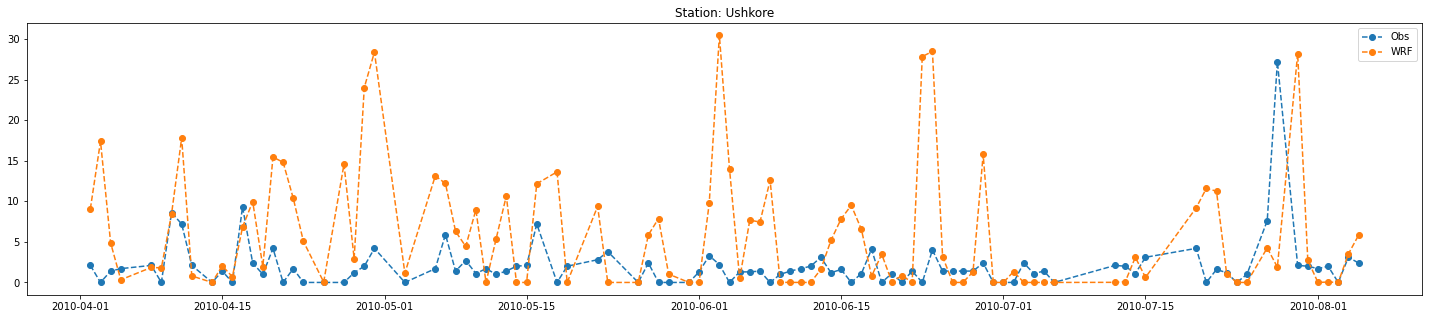

In [106]:
plt.figure(figsize=(25,5))
plt.plot(x0, x1, '--o', label='Obs',)
plt.plot(x0, x2, '--o', label='WRF')
plt.legend()
plt.title(f"Station: {s}")
plt.show()